**AVANCE 1 PROYECTO INTEGRADOR ANÁLISIS CAUSAL DE LA PRODUCCIÓN Y CALIDAD LECHERA**

EQUIPO #42

MIGUEL ÁNGEL HERNÁNDEZ NÚÑEZ A01795751

ESTEBAN HIDEKEL SOLARES OROZCO A01657027

JOSE MANUEL ROMO PEREDO A01065270


In [ ]:
import pandas as pd
import os

# Ruta del archivo
file_path = './data/Dataset.csv'

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(file_path):
    # Cargar el dataset con codificación 'latin1' para manejar caracteres especiales
    df = pd.read_csv(file_path, encoding='latin1')
    # Mostrar las primeras filas del dataframe
    display(df.head())
else:
    print(f"Error: No se encontró el archivo en {file_path}.")
    print("Sugerencia: Sube el archivo a Colab o verifica la ruta en Google Drive.")
    # Listar archivos en /content para ayudar al usuario
    print("Archivos disponibles en /content:", os.listdir('/content'))

,Hora de inicio,Número de ordeño,Duración (mm:ss),Producción (kg),Intervalo de ordeño (hh:mm),Duracion de Incremento,Duracion de Decremento,Tiempo de Incremento,Tiempo de Decremento,Ubre,...,Razón de la desviación,Programa de lavado,MS,Usuario,Tipo de evento,Fecha del evento,Descripción,Usuario.1,Comentario,Num Lactacion
0,01/01/2025 08:33,1,06:08,14.07,09:21,2.81,3.08,4.50,3.68,0.0,...,NaN,NaN,VMS 1,NaN,Cambio de grup,02/08/2021 00:00,"2, VMS 2 -> 3, VMS 3",User1,NaN,1.0
1,01/01/2025 21:11,2,08:01,19.25,12:32,3.76,4.46,6.03,5.00,0.0,...,NaN,NaN,VMS 1,NaN,Control de Gest,02/07/2031 00:00,+,User1,CARGADA DE 153,1.0
2,02/01/2025 06:29,1,06:26,13.96,09:09,2.95,3.24,4.38,3.39,0.0,...,NaN,NaN,VMS 1,NaN,Invitación Visita,02/07/2031 00:00,"31/07/2025, Reconfirmacion 2 (150-\n160 dias)",DR RAFA (,NaN,1.0
3,02/01/2025 21:21,2,07:34,22.74,14:45,4.69,5.16,7.10,5.79,0.0,...,NaN,NaN,VMS 1,NaN,Control de Gest,02/05/2029 00:00,+,User1,cargada de 90,1.0
4,03/01/2025 08:30,1,07:28,19.27,11:01,4.10,4.36,6.07,4.74,0.0,...,NaN,NaN,VMS 1,NaN,Invitación Visita,02/05/2029 00:00,"29/05/2025, Reconfirmacion 1 (90-\n110 dias)",DR RAFA (,NaN,1.0


Se identifican columnas que requieren conversión de unidades y separación de variables para un mejor tratamiento de los datos, se separa la columna 'Hora de inicio' en dos columnas llamadas ´Hora de ordeño' y 'Numero de ordeño' y se elimina 'Hora de inicio'

In [ ]:




# Recargamos el dataset para asegurar que la columna 'Hora de inicio' esté presente
file_path = '/content/drive/MyDrive/PROYECTO INTEGRADOR/Dataset_Unificado.csv'
df = pd.read_csv(file_path, encoding='latin1')

# 1. Convertir 'Hora de inicio' a formato datetime
df['Hora de inicio'] = pd.to_datetime(df['Hora de inicio'], format='%d/%m/%Y %H:%M')

# 2. Crear las nuevas columnas de fecha y hora
df['Fecha de ordeño'] = df['Hora de inicio'].dt.date
df['Hora de ordeño'] = df['Hora de inicio'].dt.time

# 3. Eliminar la columna original 'Hora de inicio'
df.drop(columns=['Hora de inicio'], inplace=True)

# 4. Modificar 'Fecha del evento' para que solo contenga la fecha (sin hora)
df['Fecha del evento'] = pd.to_datetime(df['Fecha del evento'], errors='coerce').dt.date

# 5. Reordenar las columnas para que las nuevas estén al inicio
cols = df.columns.tolist()
# Las nuevas columnas ('Fecha de ordeño' y 'Hora de ordeño') están al final
new_order = cols[-2:] + cols[:-2]
df = df[new_order]

# Mostrar el resultado final
df.head()

,Fecha de ordeño,Hora de ordeño,Número de ordeño,Duración (mm:ss),Producción (kg),Intervalo de ordeño (hh:mm),Duracion de Incremento,Duracion de Decremento,Tiempo de Incremento,Tiempo de Decremento,...,Razón de la desviación,Programa de lavado,MS,Usuario,Tipo de evento,Fecha del evento,Descripción,Usuario.1,Comentario,Num Lactacion
0,2025-01-01,08:33:00,1,06:08,14.07,09:21,2.81,3.08,4.50,3.68,...,NaN,NaN,VMS 1,NaN,Cambio de grup,2021-02-08,"2, VMS 2 -> 3, VMS 3",User1,NaN,1.0
1,2025-01-01,21:11:00,2,08:01,19.25,12:32,3.76,4.46,6.03,5.00,...,NaN,NaN,VMS 1,NaN,Control de Gest,2031-02-07,+,User1,CARGADA DE 153,1.0
2,2025-01-02,06:29:00,1,06:26,13.96,09:09,2.95,3.24,4.38,3.39,...,NaN,NaN,VMS 1,NaN,Invitación Visita,2031-02-07,"31/07/2025, Reconfirmacion 2 (150-\n160 dias)",DR RAFA (,NaN,1.0
3,2025-01-02,21:21:00,2,07:34,22.74,14:45,4.69,5.16,7.10,5.79,...,NaN,NaN,VMS 1,NaN,Control de Gest,2029-02-05,+,User1,cargada de 90,1.0
4,2025-01-03,08:30:00,1,07:28,19.27,11:01,4.10,4.36,6.07,4.74,...,NaN,NaN,VMS 1,NaN,Invitación Visita,2029-02-05,"29/05/2025, Reconfirmacion 1 (90-\n110 dias)",DR RAFA (,NaN,1.0


Se convierten unidades en columna 'Duracion' de minutos a segundos, en columna 'Intervalo de ordeño' de horas a minutos, en columna 'Producción' de kg a gramos

In [ ]:
# 1. Definir funciones auxiliares para la conversión de tiempo
def mmss_to_seconds(val):
    try:
        if pd.isna(val) or not isinstance(val, str) or ':' not in val: return val
        mm, ss = map(int, val.split(':'))
        return mm * 60 + ss
    except: return val

def hhmm_to_minutes(val):
    try:
        if pd.isna(val) or not isinstance(val, str) or ':' not in val: return val
        hh, mm = map(int, val.split(':'))
        return hh * 60 + mm
    except: return val

# 2. Realizar conversiones y normalizar nombres
# Si las columnas ya existen con nombres finales al final del DF, las normalizamos para el reordenado
if 'duracion de ordeño (seg)' in df.columns:
    df.rename(columns={'duracion de ordeño (seg)': 'Duración (seg)'}, inplace=True)

# Aplicar conversiones in-place si aún tienen nombres originales
if 'Duración (mm:ss)' in df.columns:
    df['Duración (mm:ss)'] = df['Duración (mm:ss)'].apply(mmss_to_seconds)
    df.rename(columns={'Duración (mm:ss)': 'Duración (seg)'}, inplace=True)

if 'Intervalo de ordeño (hh:mm)' in df.columns:
    df['Intervalo de ordeño (hh:mm)'] = df['Intervalo de ordeño (hh:mm)'].apply(hhmm_to_minutes)
    df.rename(columns={'Intervalo de ordeño (hh:mm)': 'Intervalo de ordeño (min)'}, inplace=True)

if 'Producción (kg)' in df.columns:
    df['Producción (kg)'] = df['Producción (kg)'] * 1000
    df.rename(columns={'Producción (kg)': 'Producción (g)'}, inplace=True)

# 3. Reordenar las columnas para asegurar la posición solicitada
# Definimos el orden lógico deseado (Fecha, Hora, Número, Duración, Producción, Intervalo...)
target_order = ['Fecha de ordeño', 'Hora de ordeño', 'Número de ordeño', 'Duración (seg)', 'Producción (g)', 'Intervalo de ordeño (min)']

# Filtramos las columnas que realmente existen en el DF actual
existing_targets = [c for c in target_order if c in df.columns]
remaining_cols = [c for c in df.columns if c not in existing_targets]

# Reconstruimos el DataFrame con el orden correcto
df = df[existing_targets + remaining_cols]

# Mostrar el resultado final
df.head()

,Fecha de ordeño,Hora de ordeño,Número de ordeño,Duración (seg),Producción (g),Intervalo de ordeño (min),Duracion de Incremento,Duracion de Decremento,Tiempo de Incremento,Tiempo de Decremento,...,Razón de la desviación,Programa de lavado,MS,Usuario,Tipo de evento,Fecha del evento,Descripción,Usuario.1,Comentario,Num Lactacion
0,2025-01-01,08:33:00,1,368,14070.0,561,2.81,3.08,4.50,3.68,...,NaN,NaN,VMS 1,NaN,Cambio de grup,2021-02-08,"2, VMS 2 -> 3, VMS 3",User1,NaN,1.0
1,2025-01-01,21:11:00,2,481,19250.0,752,3.76,4.46,6.03,5.00,...,NaN,NaN,VMS 1,NaN,Control de Gest,2031-02-07,+,User1,CARGADA DE 153,1.0
2,2025-01-02,06:29:00,1,386,13960.0,549,2.95,3.24,4.38,3.39,...,NaN,NaN,VMS 1,NaN,Invitación Visita,2031-02-07,"31/07/2025, Reconfirmacion 2 (150-\n160 dias)",DR RAFA (,NaN,1.0
3,2025-01-02,21:21:00,2,454,22740.0,885,4.69,5.16,7.10,5.79,...,NaN,NaN,VMS 1,NaN,Control de Gest,2029-02-05,+,User1,cargada de 90,1.0
4,2025-01-03,08:30:00,1,448,19270.0,661,4.10,4.36,6.07,4.74,...,NaN,NaN,VMS 1,NaN,Invitación Visita,2029-02-05,"29/05/2025, Reconfirmacion 1 (90-\n110 dias)",DR RAFA (,NaN,1.0


In [ ]:
# Contar cuántas son object (texto/categorías)
num_object = df.select_dtypes(include="object")

# Contar cuántas son numéricas
num_numeric = df.select_dtypes(include="number")

print(f"Columnas tipo object: {num_object.shape[1]}")
print(f"Columnas numéricas: {num_numeric.shape[1]}")

Columnas tipo object: 14
Columnas numéricas: 9


In [138]:
# Listar columnas agrupadas por tipo de dato
print("Listado de columnas por tipo de dato:\n")

# Identificar tipos de datos únicos en el DataFrame
for dtype in df.dtypes.unique():
    # Filtrar columnas que coinciden con el tipo de dato actual
    columnas = df.select_dtypes(include=[dtype]).columns.tolist()
    print(f"Tipo: {dtype}")
    for col in columnas:
        print(f"  - {col}")
    print("-" * 30)

Listado de columnas por tipo de dato:

Tipo: object
  - Fecha de ordeño
  - Hora de ordeño
  - Duración (seg)
  - Intervalo de ordeño (min)
  - Pezón
  - Destino Leche
  - Razón de la desviación
  - Programa de lavado
  - MS
  - Tipo de evento
  - Fecha del evento
  - Descripción
  - Usuario.1
  - Comentario
------------------------------
Tipo: int64
  - Número de ordeño
------------------------------
Tipo: float64
  - Producción (g)
  - Duracion de Incremento
  - Duracion de Decremento
  - Tiempo de Incremento
  - Tiempo de Decremento
  - Ubre
  - Usuario
  - Num Lactacion
------------------------------


**Se realizan conversiones de tipo de datos de algunas columnas para facilitar el tratamiento de los datos**

In [139]:
# 1. Crear una copia del DataFrame original
df_procesado = df.copy()

# 2. Convertir Intervalo y Duración a int64 (se llenan nulos con 0 para permitir la conversión a int64 estándar)
# Nota: Si prefieres mantener los nulos, se usaría el tipo 'Int64' de pandas.
cols_entero = ['Intervalo de ordeño (min)', 'Duración (seg)']
for col in cols_entero:
    if col in df_procesado.columns:
        df_procesado[col] = pd.to_numeric(df_procesado[col], errors='coerce').fillna(0).astype('int64')

# 3. Convertir las otras columnas a object
cols_objeto = ['Número de ordeño', 'Ubre', 'Usuario', 'Num Lactacion']
for col in cols_objeto:
    if col in df_procesado.columns:
        df_procesado[col] = df_procesado[col].astype(object)

# 4. Imprimir el resumen de tipos de datos
print("Cantidades de columnas por tipo de dato:")
resumen_tipos = df_procesado.dtypes.value_counts()
print(resumen_tipos)

print("\nDetalle de conteo:")
for tipo, cantidad in resumen_tipos.items():
    print(f"Hay {cantidad} columnas de tipo {tipo}")

# Mostrar las primeras filas para verificar
df_procesado.head()

Cantidades de columnas por tipo de dato:
object     16
float64     5
int64       2
Name: count, dtype: int64

Detalle de conteo:
Hay 16 columnas de tipo object
Hay 5 columnas de tipo float64
Hay 2 columnas de tipo int64


,Fecha de ordeño,Hora de ordeño,Número de ordeño,Duración (seg),Producción (g),Intervalo de ordeño (min),Duracion de Incremento,Duracion de Decremento,Tiempo de Incremento,Tiempo de Decremento,...,Razón de la desviación,Programa de lavado,MS,Usuario,Tipo de evento,Fecha del evento,Descripción,Usuario.1,Comentario,Num Lactacion
0,2025-01-01,08:33:00,1,368,14070.0,561,2.81,3.08,4.50,3.68,...,NaN,NaN,VMS 1,NaN,Cambio de grup,2021-02-08,"2, VMS 2 -> 3, VMS 3",User1,NaN,1.0
1,2025-01-01,21:11:00,2,481,19250.0,752,3.76,4.46,6.03,5.00,...,NaN,NaN,VMS 1,NaN,Control de Gest,2031-02-07,+,User1,CARGADA DE 153,1.0
2,2025-01-02,06:29:00,1,386,13960.0,549,2.95,3.24,4.38,3.39,...,NaN,NaN,VMS 1,NaN,Invitación Visita,2031-02-07,"31/07/2025, Reconfirmacion 2 (150-\n160 dias)",DR RAFA (,NaN,1.0
3,2025-01-02,21:21:00,2,454,22740.0,885,4.69,5.16,7.10,5.79,...,NaN,NaN,VMS 1,NaN,Control de Gest,2029-02-05,+,User1,cargada de 90,1.0
4,2025-01-03,08:30:00,1,448,19270.0,661,4.10,4.36,6.07,4.74,...,NaN,NaN,VMS 1,NaN,Invitación Visita,2029-02-05,"29/05/2025, Reconfirmacion 1 (90-\n110 dias)",DR RAFA (,NaN,1.0


In [140]:
# Listar columnas de df_procesado agrupadas por tipo de dato
print("Listado de columnas de df_procesado por tipo de dato:\n")

# Identificar tipos de datos únicos en el nuevo DataFrame
for dtype in df_procesado.dtypes.unique():
    # Filtrar columnas que coinciden con el tipo de dato actual
    columnas = df_procesado.select_dtypes(include=[dtype]).columns.tolist()
    print(f"Tipo: {dtype}")
    for col in columnas:
        print(f"  - {col}")
    print("-" * 30)

Listado de columnas de df_procesado por tipo de dato:

Tipo: object
  - Fecha de ordeño
  - Hora de ordeño
  - Número de ordeño
  - Ubre
  - Pezón
  - Destino Leche
  - Razón de la desviación
  - Programa de lavado
  - MS
  - Usuario
  - Tipo de evento
  - Fecha del evento
  - Descripción
  - Usuario.1
  - Comentario
  - Num Lactacion
------------------------------
Tipo: int64
  - Duración (seg)
  - Intervalo de ordeño (min)
------------------------------
Tipo: float64
  - Producción (g)
  - Duracion de Incremento
  - Duracion de Decremento
  - Tiempo de Incremento
  - Tiempo de Decremento
------------------------------


In [141]:
# Porcentaje (%) de valores faltantes por columna
df_procesado.isna().sum().mul(100).div(len(df)).sort_values(ascending=False)

,0
Usuario,100.000000
Razón de la desviación,99.913341
Programa de lavado,97.086617
Comentario,95.076961
Pezón,90.463418
Usuario.1,74.113812
Descripción,73.515454
Num Lactacion,73.498948
Fecha del evento,73.498948
Tipo de evento,73.498948


**ANÁLISIS DE VARIABLES NUMÉRICAS**

In [142]:
# Estadística descriptiva
df_procesado.describe().T

,count,mean,std,min,25%,50%,75%,max
Duración (seg),24233.0,478.964718,151.022830,0.0,371.00,446.00,552.00,1423.00
Producción (g),24233.0,15469.907564,5443.108799,0.0,11540.00,14860.00,18850.00,41240.00
Intervalo de ordeño (min),24233.0,572.731688,211.537143,0.0,433.00,537.00,682.00,1439.00
Duracion de Incremento,23730.0,3.540992,1.755153,0.0,2.44,3.43,4.59,11.38
Duracion de Decremento,23613.0,3.829741,1.584946,0.0,2.75,3.70,4.80,11.98
Tiempo de Incremento,22429.0,4.342843,2.144137,0.0,3.00,4.23,5.65,16.27
Tiempo de Decremento,24220.0,4.196357,2.200229,0.0,2.78,4.10,5.54,17.16


Se identifica sesgo en las variables

In [143]:
# 1. Identificar variables numéricas en el DataFrame procesado
vars_numericas = df_procesado.select_dtypes(include=['number'])

# 2. Calcular el coeficiente de asimetría (skewness)
sesgo = vars_numericas.skew().sort_values(ascending=False)

# 3. Mostrar los resultados
print("Coeficiente de Asimetría (Skewness) por variable:")
print("Nota: > 0 indica sesgo positivo, < 0 indica sesgo negativo, ~ 0 es simétrica\n")
print(sesgo)

# 4. Comparar media vs mediana para confirmar visualmente el sesgo
comparacion = pd.DataFrame({
    'Media': vars_numericas.mean(),
    'Mediana (50%)': vars_numericas.median(),
    'Sesgo': sesgo
})

print("\nComparativa de Media vs Mediana:")
display(comparacion)

Coeficiente de Asimetría (Skewness) por variable:
Nota: > 0 indica sesgo positivo, < 0 indica sesgo negativo, ~ 0 es simétrica

Duración (seg)               1.231904
Intervalo de ordeño (min)    0.821798
Producción (g)               0.517803
Duracion de Decremento       0.441350
Duracion de Incremento       0.415614
Tiempo de Decremento         0.414223
Tiempo de Incremento         0.395839
dtype: float64

Comparativa de Media vs Mediana:


,Media,Mediana (50%),Sesgo
Duracion de Decremento,3.829741,3.70,0.441350
Duracion de Incremento,3.540992,3.43,0.415614
Duración (seg),478.964718,446.00,1.231904
Intervalo de ordeño (min),572.731688,537.00,0.821798
Producción (g),15469.907564,14860.00,0.517803
Tiempo de Decremento,4.196357,4.10,0.414223
Tiempo de Incremento,4.342843,4.23,0.395839


**ANÁLISIS UNIVARIANTE**

**HISTOGRAMAS Y BOXPLOT EN VARIABLES NÚMERICAS**

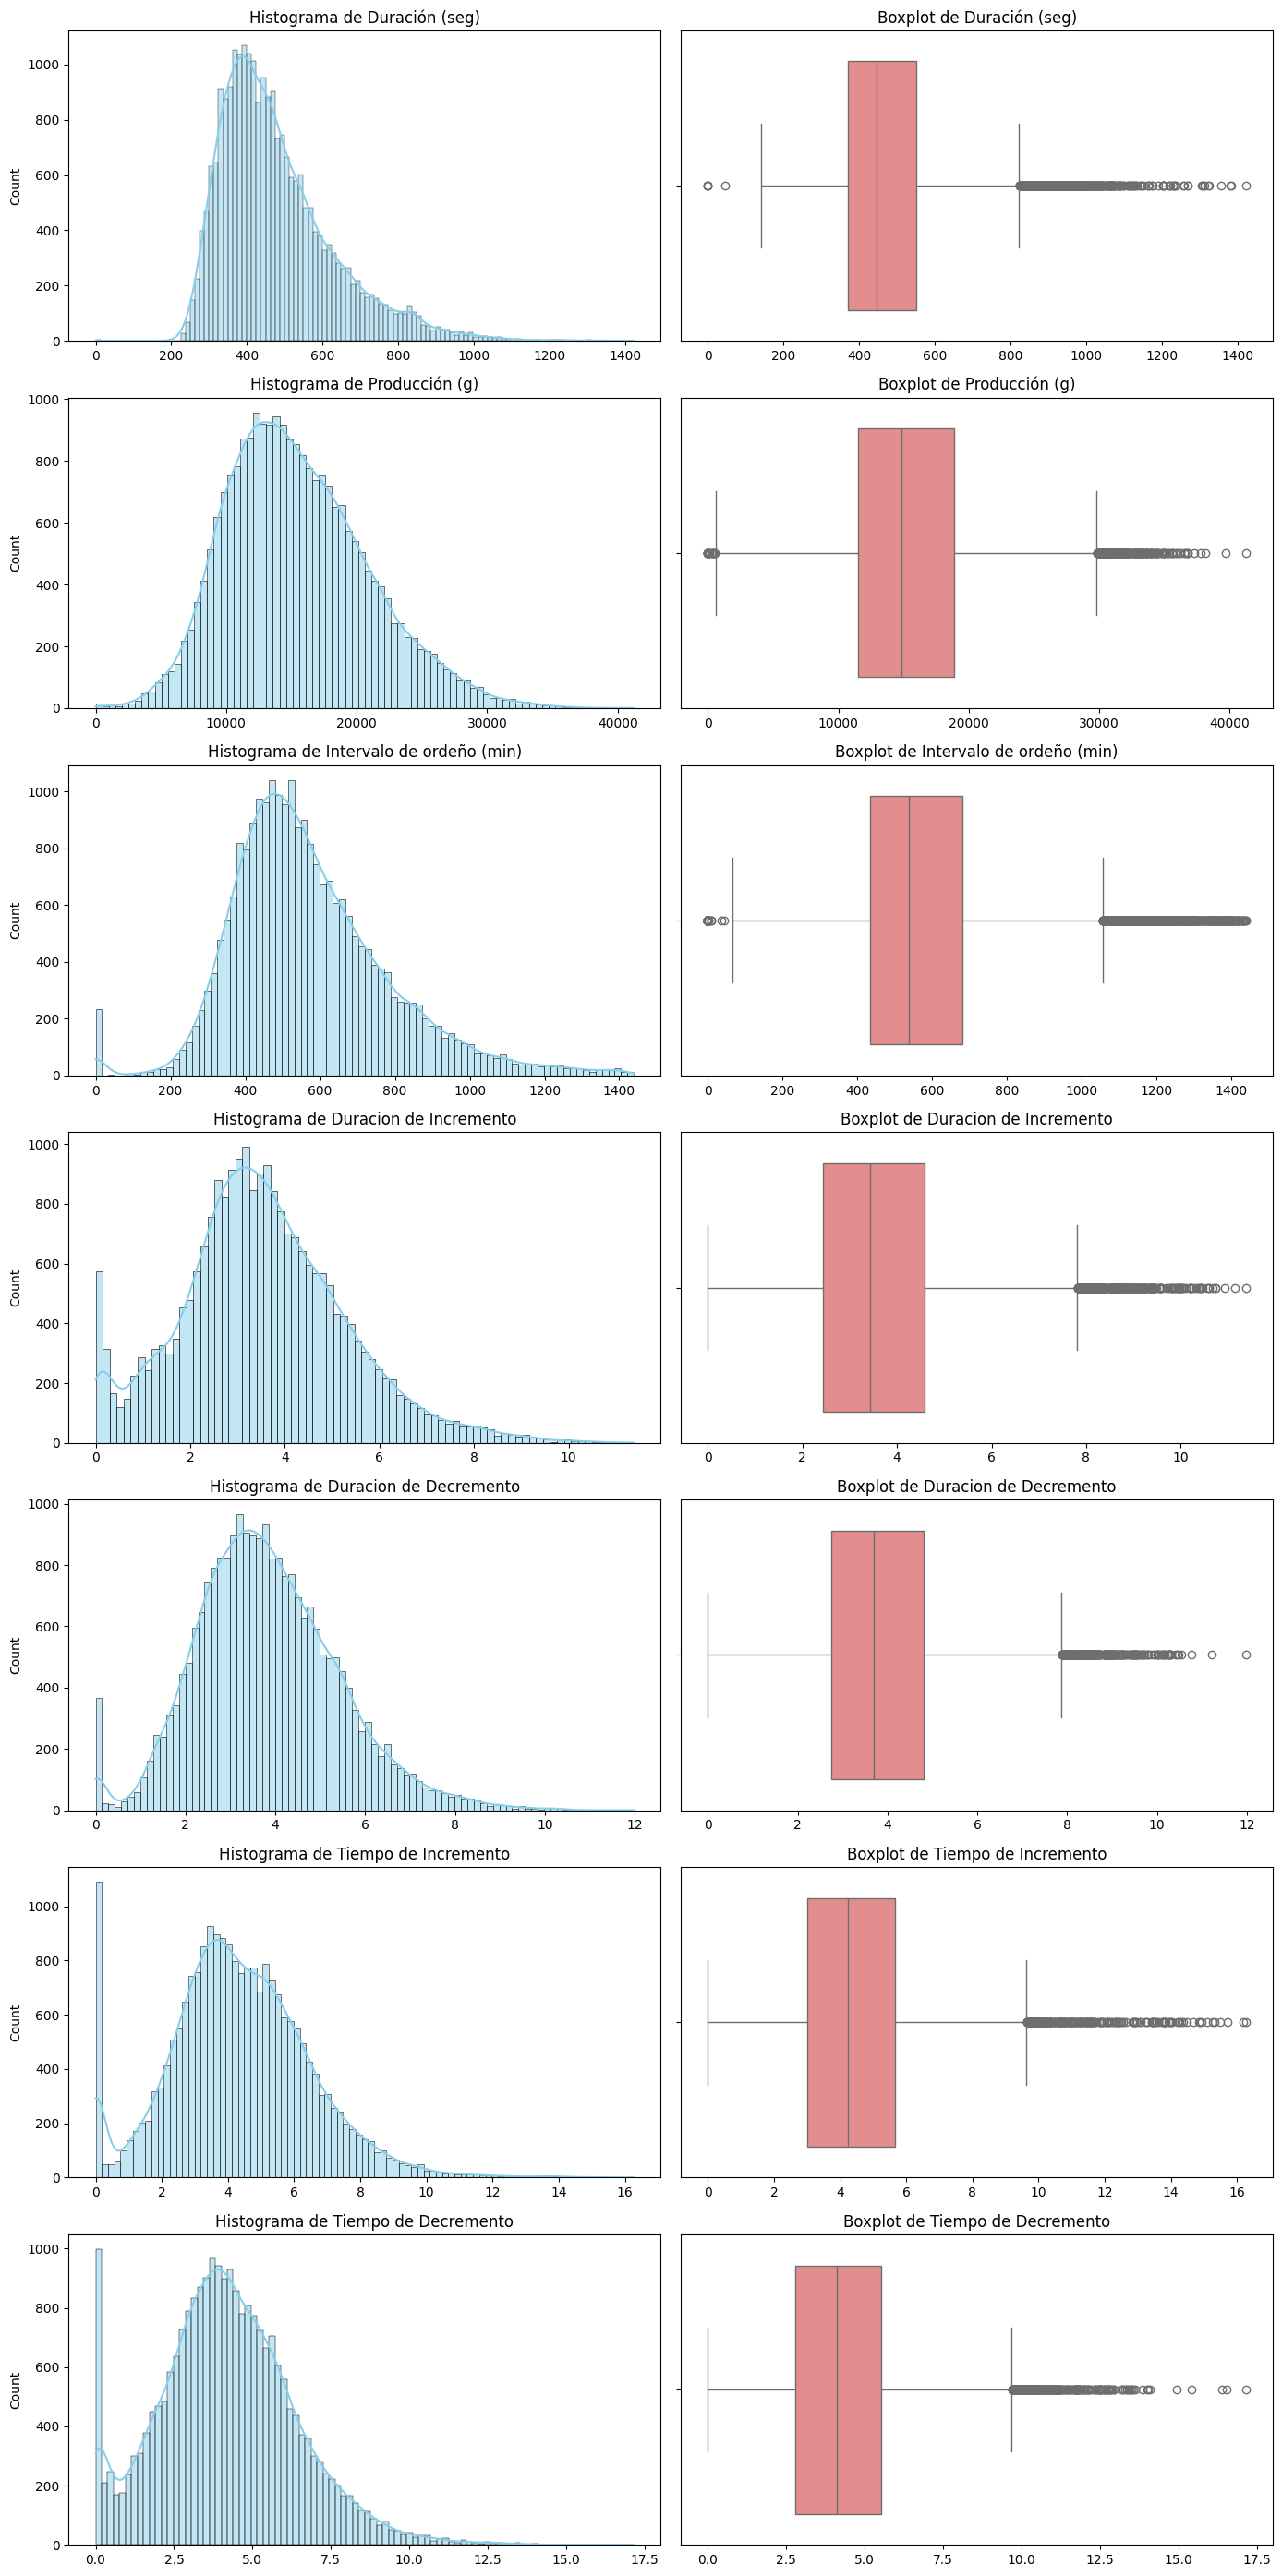

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seleccionar las variables numericas del DataFrame procesado
columnas_num = df_procesado.select_dtypes(include=['number']).columns

# 2. Configurar la cuadricula de graficas (una fila por variable, dos columnas: histograma y boxplot)
fig, axes = plt.subplots(nrows=len(columnas_num), ncols=2, figsize=(14, 4 * len(columnas_num)))

for i, col in enumerate(columnas_num):
    # Histograma con KDE (linea de densidad)
    sns.histplot(df_procesado[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histograma de {col}', fontsize=12)
    axes[i, 0].set_xlabel('')

    # Boxplot para detectar outliers
    sns.boxplot(x=df_procesado[col], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Boxplot de {col}', fontsize=12)
    axes[i, 1].set_xlabel('')

# 3. Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

**Las gráficas confirman visualmente el sesgo positivo y la presencia de valores atípicos que detectamos estadísticamente, lo cual es fundamental para entender la variabilidad en la producción y duración del ordeño.**

**ANÁLISIS DE VARIABLES CATEGÓRICAS**

In [145]:
df_procesado.describe(include='O').T

,count,unique,top,freq
Fecha de ordeño,24233,199,2025-02-27,171
Hora de ordeño,24233,1427,01:25:00,34
Número de ordeño,24233,6,1,10015
Ubre,23763.0,2.0,0.0,20316.0
Pezón,2311,16,TD,815
Destino Leche,24233,5,Tanque,23071
Razón de la desviación,21,2,Sangre por pezón por encima del umbral,19
Programa de lavado,706,1,Local Aclarado,706
MS,24233,4,VMS 2,9605
Usuario,0,0,NaN,NaN


/tmp/ipython-input-1555216261.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_procesado, y=col, ax=axes[i], order=order, palette='magma')
/tmp/ipython-input-1555216261.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_procesado, y=col, ax=axes[i], order=order, palette='magma')
/tmp/ipython-input-1555216261.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_procesado, y=col, ax=axes[i], order=order, palette='magma')
/tmp/ipython-input-1555216261.py:17: FutureWarning: 

Passing `palette` without assignin

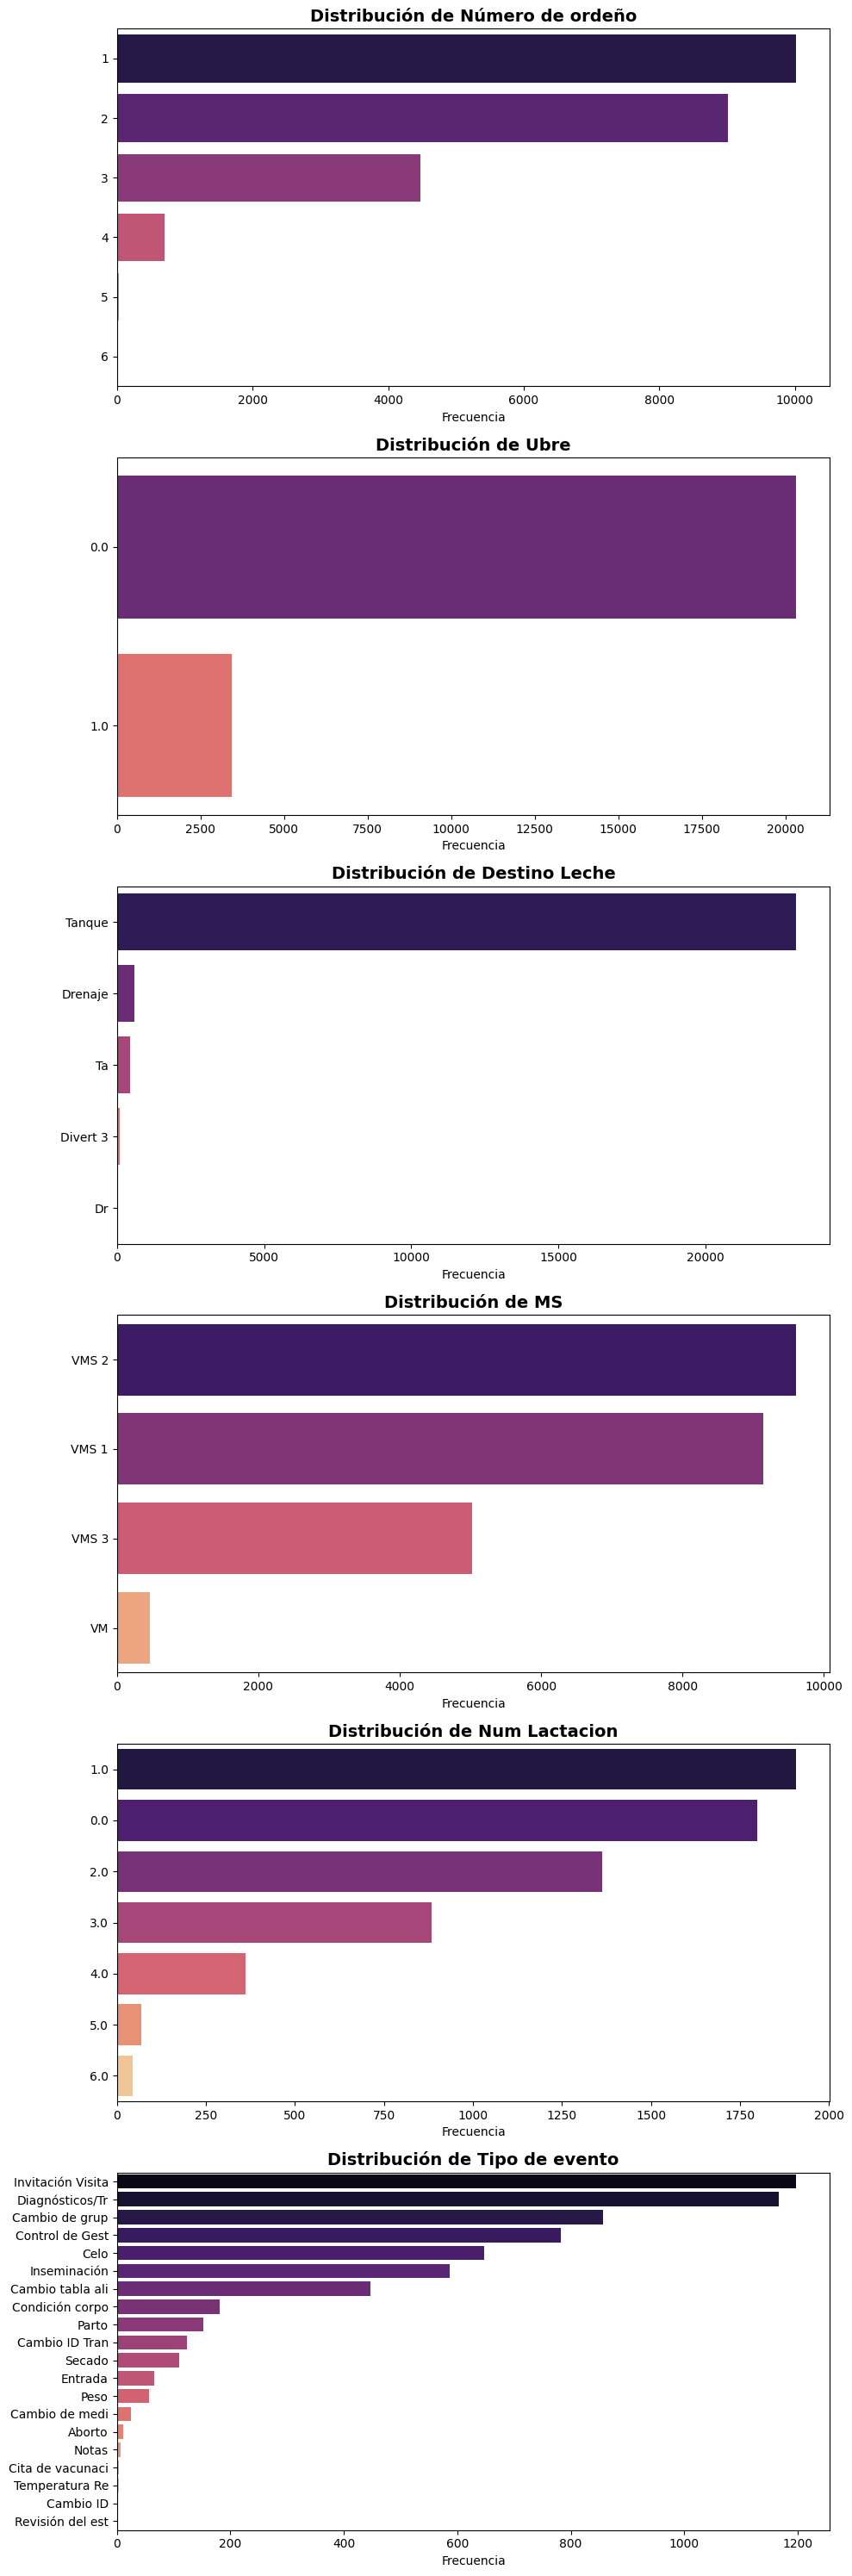

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seleccionar variables categóricas relevantes para graficar
# Evitamos columnas con demasiados valores únicos (como fechas o descripciones largas)
columnas_cat = ['Número de ordeño', 'Ubre', 'Destino Leche', 'MS', 'Num Lactacion', 'Tipo de evento']

# 2. Configurar la cuadrícula de gráficas
n_rows = len(columnas_cat)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(10, 5 * n_rows))

for i, col in enumerate(columnas_cat):
    # Obtener el orden por frecuencia para que la gráfica sea más clara
    order = df_procesado[col].value_counts().index

    # Crear gráfica de barras horizontal para mejor lectura de etiquetas
    sns.countplot(data=df_procesado, y=col, ax=axes[i], order=order, palette='magma')
    axes[i].set_title(f'Distribución de {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Frecuencia')
    axes[i].set_ylabel('')

# 3. Ajustar el diseño final
plt.tight_layout()
plt.show()

****

### Análisis de las Gráficas de Variables Categóricas

El análisis visual de las distribuciones de frecuencia para las variables categóricas revela información estructural importante sobre el hato y la operación de ordeño:

1. **Número de Ordeño y Lactancia:**
   * Se observa que el **Número de ordeño 1** es el más frecuente, lo que indica una alta actividad en las primeras horas del ciclo diario.
   * La mayoría de los animales se encuentran en su **primera lactancia (1.0)**, lo que sugiere un hato joven o una proporción significativa de vaquillas en el sistema.

2. **Uso de Equipos y Destino de la Leche:**
   * El **VMS 2** destaca como el sistema de ordeño con mayor carga de trabajo, seguido de cerca por los otros robots. Esto muestra una distribución del trabajo relativamente balanceada entre estaciones, aunque con una ligera preferencia o asignación mayor hacia el VMS 2.
   * El destino de la leche es casi exclusivamente el **Tanque**. Los otros destinos (como rechazo o consumo interno) tienen una frecuencia mínima, lo que es un indicador de buena salud general del hato y calidad del producto.

3. **Eventos y Gestión:**
   * El evento predominante es **'Invitación Visita'**, lo que refleja un sistema de gestión proactivo donde se incentiva al animal a entrar al robot de ordeño.
   * La variable **'Ubre'** muestra una dominancia absoluta del valor **0.0**, lo que indica una uniformidad en la conformación o en el registro de esta variable específica.

Este análisis de frecuencias permite identificar las categorías 'base' del dataset y detectar si existe un desbalance extremo que deba ser ajustado antes de realizar análisis estadísticos más complejos.

****

**ANÁLISIS MULTIVARIANTE**

Matriz de Correlación:


,Duración (seg),Producción (g),Intervalo de ordeño (min),Duracion de Incremento,Duracion de Decremento,Tiempo de Incremento,Tiempo de Decremento
Duración (seg),1.000000,0.205093,0.288032,0.264159,0.319025,0.054776,-0.052603
Producción (g),0.205093,1.000000,0.540705,0.671524,0.770069,0.749350,0.717370
Intervalo de ordeño (min),0.288032,0.540705,1.000000,0.387305,0.474838,0.369054,0.318980
Duracion de Incremento,0.264159,0.671524,0.387305,1.000000,0.654635,0.235982,0.272155
Duracion de Decremento,0.319025,0.770069,0.474838,0.654635,1.000000,0.389543,0.424460
Tiempo de Incremento,0.054776,0.749350,0.369054,0.235982,0.389543,1.000000,0.501118
Tiempo de Decremento,-0.052603,0.717370,0.318980,0.272155,0.424460,0.501118,1.000000


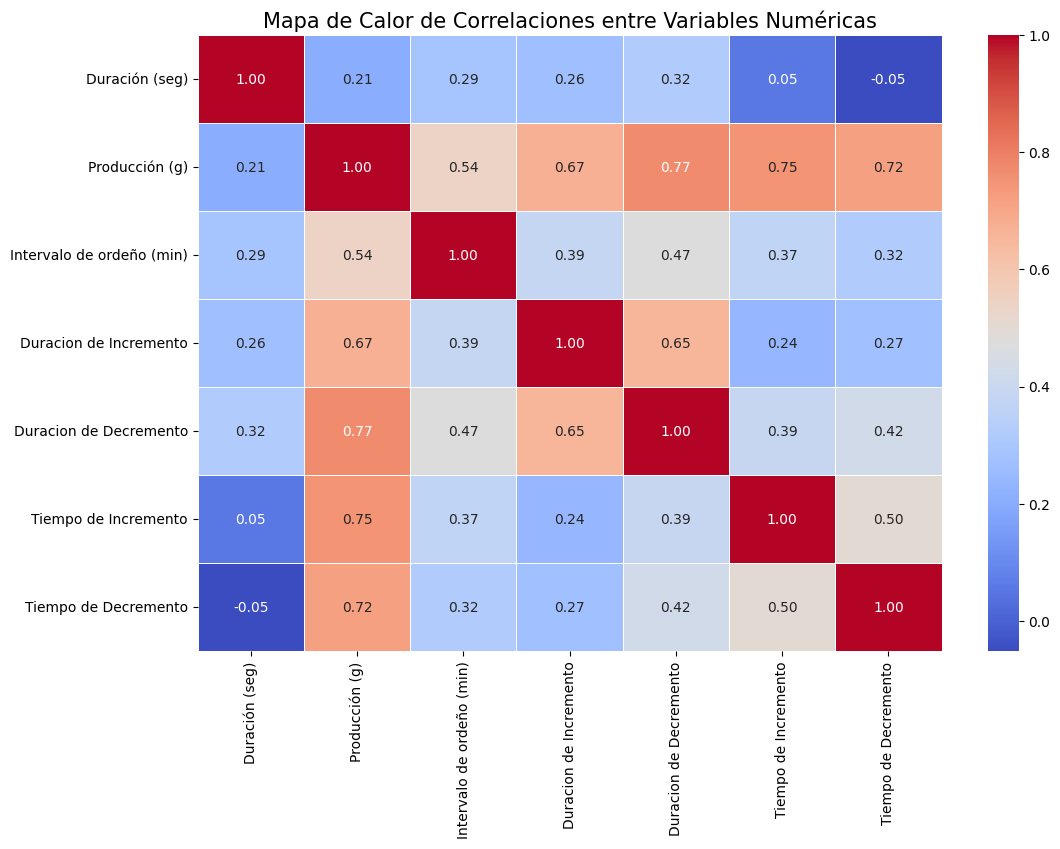

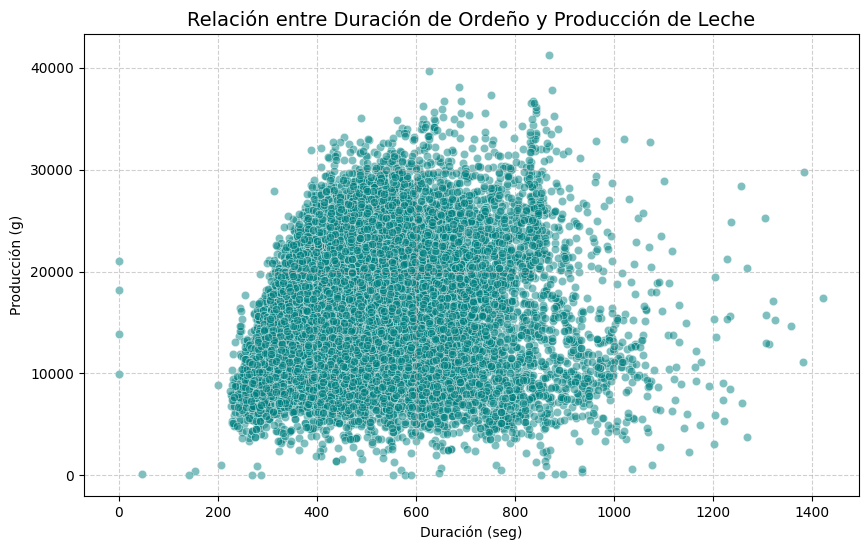

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Seleccionar solo las variables numéricas para el análisis de correlación
vars_numericas = df_procesado.select_dtypes(include=['number'])

# 2. Análisis Cuantitativo: Matriz de Correlación de Pearson
matriz_corr = vars_numericas.corr()
print("Matriz de Correlación:")
display(matriz_corr)

# 3. Análisis Gráfico: Mapa de Calor (Heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas', fontsize=15)
plt.show()

# 4. Análisis Gráfico Adicional: Relación clave entre Producción y Duración
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_procesado, x='Duración (seg)', y='Producción (g)', alpha=0.5, color='teal')
plt.title('Relación entre Duración de Ordeño y Producción de Leche', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

El análisis de correlación revela información muy valiosa sobre la producción lechera:

Factores Determinantes de la Producción: La variable Producción (g) tiene sus correlaciones más fuertes con las fases del proceso: Duracion de Decremento (0.77), Tiempo de Incremento (0.75) y Tiempo de Decremento (0.72). Esto indica que la dinámica del flujo de leche durante estas etapas es un excelente predictor del volumen total obtenido.

Intervalo de Ordeño: Existe una correlación moderada (0.54) entre el tiempo transcurrido desde el ultimo ordeño y la producción. Como era de esperarse, a mayor tiempo de espera (dentro de los límites biológicos), mayor es la cantidad de leche acumulada.

Duración vs. Producción: Es interesante notar que la Duración (seg) total tiene una correlación débil (0.21) con la producción.

El gráfico de dispersión muestra mucha variabilidad: hay sesiones cortas muy productivas y sesiones largas con producción baja, lo que sugiere que la eficiencia del ordeño varía significativamente entre animales o sesiones.

Este análisis multivariante confirma que para mejorar la producción, es más importante entender la eficiencia de las fases de incremento y decremento que simplemente la duración total del tiempo que la vaca pasa en el robot.

**PREPROCESAMIENTO**

## Valores Faltantes


Identificar y tratar los valores faltantes eliminando columnas con baja densidad de información e imputando el resto.


In [148]:
import pandas as pd

# 1. Identificar y eliminar columnas con > 90% de valores nulos
null_pct = df_procesado.isna().sum().mul(100).div(len(df_procesado))
cols_to_drop = null_pct[null_pct > 90].index.tolist()
print(f"Columnas eliminadas (>90% nulos): {cols_to_drop}")
df_procesado.drop(columns=cols_to_drop, inplace=True)

# 2. Dividir columnas restantes en numéricas y categóricas
num_cols = df_procesado.select_dtypes(include=['number']).columns
cat_cols = df_procesado.select_dtypes(include=['object']).columns

# 3. Imputar columnas numéricas con la mediana
for col in num_cols:
    median_val = df_procesado[col].median()
    df_procesado[col] = df_procesado[col].fillna(median_val)

# 4. Imputar columnas categóricas con 'Sin Registro'
for col in cat_cols:
    df_procesado[col] = df_procesado[col].fillna('Sin Registro')

# 5. Verificar que no queden valores nulos
print("\nSuma de valores nulos por columna después de la imputación:")
print(df_procesado.isna().sum())

# Mostrar resumen del dataframe
display(df_procesado.info())
display(df_procesado.head())

Columnas eliminadas (>90% nulos): ['Pezón', 'Razón de la desviación', 'Programa de lavado', 'Usuario', 'Comentario']

Suma de valores nulos por columna después de la imputación:
Fecha de ordeño              0
Hora de ordeño               0
Número de ordeño             0
Duración (seg)               0
Producción (g)               0
Intervalo de ordeño (min)    0
Duracion de Incremento       0
Duracion de Decremento       0
Tiempo de Incremento         0
Tiempo de Decremento         0
Ubre                         0
Destino Leche                0
MS                           0
Tipo de evento               0
Fecha del evento             0
Descripción                  0
Usuario.1                    0
Num Lactacion                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24233 entries, 0 to 24232
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha de ordeño          

/tmp/ipython-input-3302208621.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_procesado[col] = df_procesado[col].fillna('Sin Registro')


None

,Fecha de ordeño,Hora de ordeño,Número de ordeño,Duración (seg),Producción (g),Intervalo de ordeño (min),Duracion de Incremento,Duracion de Decremento,Tiempo de Incremento,Tiempo de Decremento,Ubre,Destino Leche,MS,Tipo de evento,Fecha del evento,Descripción,Usuario.1,Num Lactacion
0,2025-01-01,08:33:00,1,368,14070.0,561,2.81,3.08,4.50,3.68,0.0,Tanque,VMS 1,Cambio de grup,2021-02-08,"2, VMS 2 -> 3, VMS 3",User1,1.0
1,2025-01-01,21:11:00,2,481,19250.0,752,3.76,4.46,6.03,5.00,0.0,Tanque,VMS 1,Control de Gest,2031-02-07,+,User1,1.0
2,2025-01-02,06:29:00,1,386,13960.0,549,2.95,3.24,4.38,3.39,0.0,Tanque,VMS 1,Invitación Visita,2031-02-07,"31/07/2025, Reconfirmacion 2 (150-\n160 dias)",DR RAFA (,1.0
3,2025-01-02,21:21:00,2,454,22740.0,885,4.69,5.16,7.10,5.79,0.0,Tanque,VMS 1,Control de Gest,2029-02-05,+,User1,1.0
4,2025-01-03,08:30:00,1,448,19270.0,661,4.10,4.36,6.07,4.74,0.0,Tanque,VMS 1,Invitación Visita,2029-02-05,"29/05/2025, Reconfirmacion 1 (90-\n110 dias)",DR RAFA (,1.0


## Valores Atipicos
**Cálculo de Límites IQR: Calcular los cuartiles Q1, Q3 y el IQR para 'Producción (g)' y 'Duración (seg)' para definir los umbrales de detección de valores atípicos.**

In [149]:
# 1. Definir las columnas de interés
columns_interest = ['Producción (g)', 'Duración (seg)']

# 2-5. Calcular Q1, Q3, IQR y límites para cada columna
for col in columns_interest:
    Q1 = df_procesado[col].quantile(0.25)
    Q3 = df_procesado[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"--- Estadísticas de Outliers para: {col} ---")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Límite Inferior: {lower_bound}")
    print(f"Límite Superior: {upper_bound}")
    print("-" * 40)

--- Estadísticas de Outliers para: Producción (g) ---
Q1: 11540.0
Q3: 18850.0
IQR: 7310.0
Límite Inferior: 575.0
Límite Superior: 29815.0
----------------------------------------
--- Estadísticas de Outliers para: Duración (seg) ---
Q1: 371.0
Q3: 552.0
IQR: 181.0
Límite Inferior: 99.5
Límite Superior: 823.5
----------------------------------------


In [150]:
import pandas as pd

# List of columns to apply capping
columns_to_clip = ['Producción (g)', 'Duración (seg)']

for col in columns_to_clip:
    # 1. Calculate Q1, Q3, and IQR
    Q1 = df_procesado[col].quantile(0.25)
    Q3 = df_procesado[col].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Capping {col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    # 3. Apply capping using .clip()
    df_procesado[col] = df_procesado[col].clip(lower=lower_bound, upper=upper_bound)

# 4. Display updated descriptive statistics
print("\nUpdated Descriptive Statistics after Capping:")
display(df_procesado[columns_to_clip].describe())

Capping Producción (g): Lower Bound = 575.0, Upper Bound = 29815.0
Capping Duración (seg): Lower Bound = 99.5, Upper Bound = 823.5

Updated Descriptive Statistics after Capping:


,Producción (g),Duración (seg)
count,24233.000000,24233.000000
mean,15445.768786,475.427764
std,5368.492327,140.079430
min,575.000000,99.500000
25%,11540.000000,371.000000
50%,14860.000000,446.000000
75%,18850.000000,552.000000
max,29815.000000,823.500000


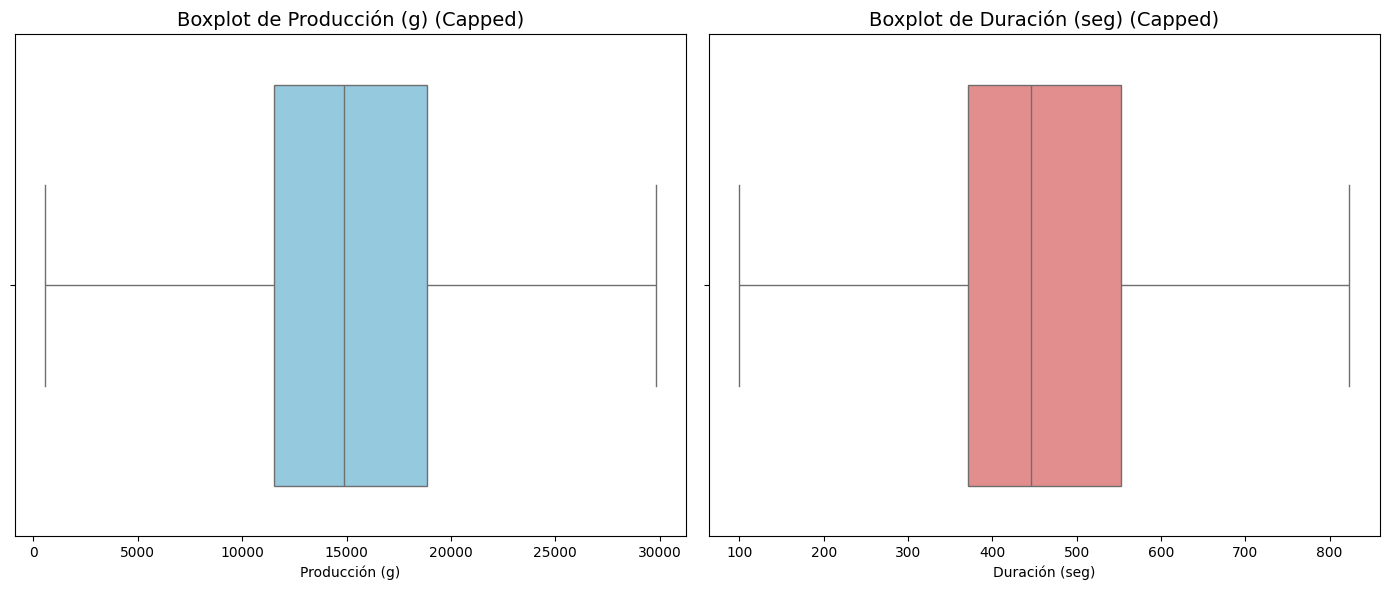

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for the boxplots
plt.figure(figsize=(14, 6))

# Boxplot for 'Producción (g)' after capping
plt.subplot(1, 2, 1)
sns.boxplot(x=df_procesado['Producción (g)'], color='skyblue')
plt.title('Boxplot de Producción (g) (Capped)', fontsize=14)
plt.xlabel('Producción (g)')

# Boxplot for 'Duración (seg)' after capping
plt.subplot(1, 2, 2)
sns.boxplot(x=df_procesado['Duración (seg)'], color='lightcoral')
plt.title('Boxplot de Duración (seg) (Capped)', fontsize=14)
plt.xlabel('Duración (seg)')

plt.tight_layout()
plt.show()

## Rec&aacute;lculo de Sesgo

Se comparan los valores originales para medir la mejora en la simetría


In [152]:
import pandas as pd

# 1. Se obtienen los valores originales
cols_to_compare = ['Producción (g)', 'Duración (seg)']
original_skew = sesgo[cols_to_compare]

# 2. Se calculan nuevos valores
new_skew = df_procesado[cols_to_compare].skew()

# 3. Se crea df de comparacion
comparison_skew = pd.DataFrame({
    'Variable': cols_to_compare,
    'Original Skewness': original_skew.values,
    'New Skewness': new_skew.values
})

# 4. Imprime tabla de comparacion
print("Comparación de la asimetría antes y después del límite:")
display(comparison_skew)

# Se agrega revision
for index, row in comparison_skew.iterrows():
    improvement = row['Original Skewness'] - row['New Skewness']
    print(f"Mejora de simetria para {row['Variable']}: {improvement:.4f}")

Comparación de la asimetría antes y después del límite:


,Variable,Original Skewness,New Skewness
0,Producción (g),0.517803,0.426495
1,Duración (seg),1.231904,0.822671


Mejora de simetria para Producción (g): 0.0913
Mejora de simetria para Duración (seg): 0.4092


## Histogramas


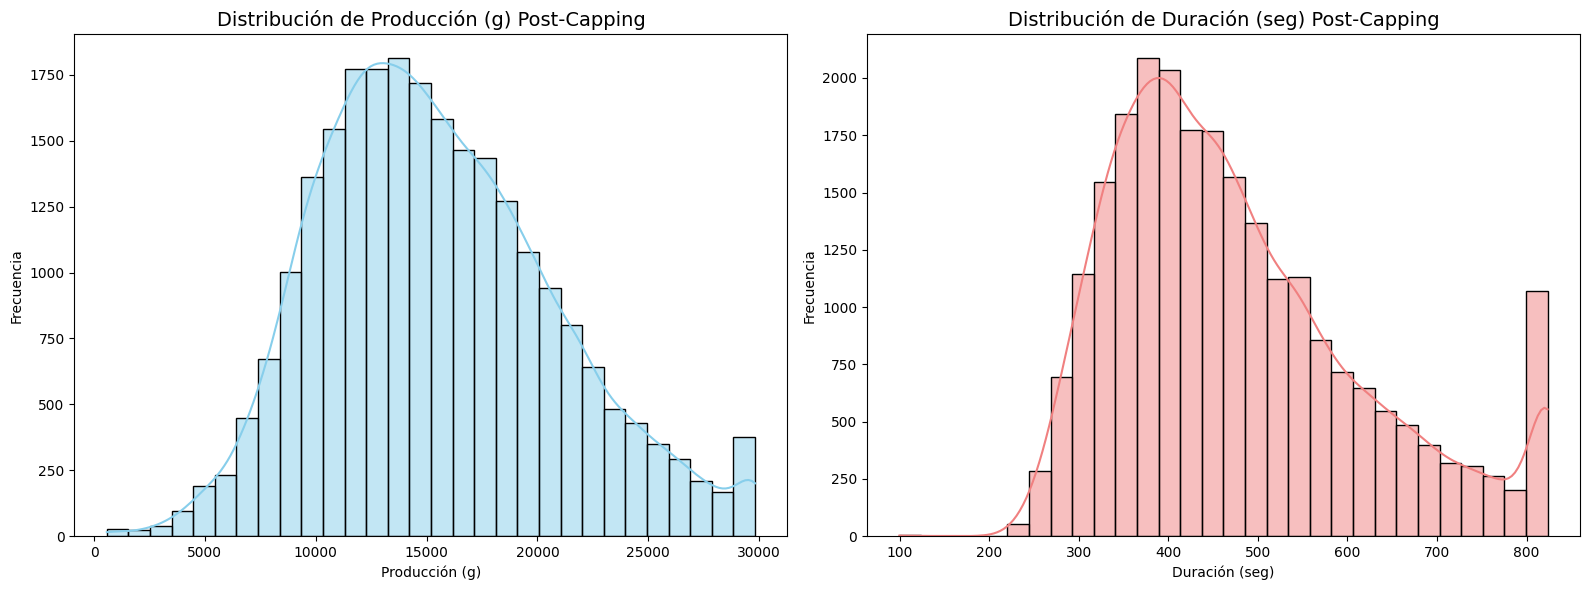

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configurar la cuadrícula de gráficas (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 2. Histograma con KDE para 'Producción (g)'
sns.histplot(df_procesado['Producción (g)'], kde=True, ax=axes[0], color='skyblue', bins=30)
axes[0].set_title('Distribución de Producción (g) Post-Capping', fontsize=14)
axes[0].set_xlabel('Producción (g)')
axes[0].set_ylabel('Frecuencia')

# 3. Histograma con KDE para 'Duración (seg)'
sns.histplot(df_procesado['Duración (seg)'], kde=True, ax=axes[1], color='lightcoral', bins=30)
axes[1].set_title('Distribución de Duración (seg) Post-Capping', fontsize=14)
axes[1].set_xlabel('Duración (seg)')
axes[1].set_ylabel('Frecuencia')

# 4. Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()

## Comparativa Estadística Final



In [154]:
import pandas as pd

# 1. Definir variables de interés
vars_interest = ['Producción (g)', 'Duración (seg)']

# 2. Extraer la media y la mediana originales del DataFrame 'comparacion'
# Nos aseguramos de seleccionar las filas y columnas correctas
original_stats = comparacion.loc[vars_interest, ['Media', 'Mediana (50%)']]
original_stats.columns = ['Media Original', 'Mediana Original']

# 3. Calcular nueva media y mediana a partir de 'df_procesado'
new_mean = df_procesado[vars_interest].mean()
new_median = df_procesado[vars_interest].median()

# 4. Crear el DataFrame resumido de comparación
comparison_summary = pd.DataFrame({
    'Media Original': original_stats['Media Original'],
    'Nueva Media': new_mean,
    'Mediana Original': original_stats['Mediana Original'],
    'Nueva Mediana': new_median
})

# 5. Calcular las brechas (Media - Mediana)
comparison_summary['Brecha Original'] = (comparison_summary['Media Original'] - comparison_summary['Mediana Original']).abs()
comparison_summary['Nueva Brecha'] = (comparison_summary['Nueva Media'] - comparison_summary['Nueva Mediana']).abs()
comparison_summary['Reducción de Brecha'] = comparison_summary['Brecha Original'] - comparison_summary['Nueva Brecha']

# Mostrar la tabla de comparación final
print("Análisis comparativo de Media vs. Mediana (Convergencia de Tendencia Central):")
display(comparison_summary)

# Verificación de mejora
for var in vars_interest:
    red = comparison_summary.loc[var, 'Reducción de Brecha']
    if red > 0:
        print(f"Éxito: La brecha para '{var}' se redujo en {red:.2f} unidades.")
    else:
        print(f"Nota: La brecha para '{var}' no disminuyó (Reducción: {red:.2f}).")

Análisis comparativo de Media vs. Mediana (Convergencia de Tendencia Central):


,Media Original,Nueva Media,Mediana Original,Nueva Mediana,Brecha Original,Nueva Brecha,Reducción de Brecha
Producción (g),15469.907564,15445.768786,14860.0,14860.0,609.907564,585.768786,24.138778
Duración (seg),478.964718,475.427764,446.0,446.0,32.964718,29.427764,3.536954


Éxito: La brecha para 'Producción (g)' se redujo en 24.14 unidades.
Éxito: La brecha para 'Duración (seg)' se redujo en 3.54 unidades.


### **CONCLUSIONES**

Inicialmente se identificaron los tipos de datos que contenia el dataset observando en primera instancia variables con un tipo de dato erroneo y que no permitian realizar en los siguientes pasos un tratamiento correcto de ellos, por lo que se procedio a realizar el cambio de tipo de dato.

El análisis exploratorio permitió identificar distribuciones y posibles relaciones entre las variables, se observó variabilidad entre animales según su número de lactación. En esta etapa fue clave para detectar valores atípicos, tendencias generales y confirmar la coherencia de los datos.


Durante el preprocesamiento se abordaron valores faltantes, se ajustaron tipos de datos y se estandarizaron variables cuando fue necesario. Estas acciones mejoraron la calidad del dataset y aseguraron que los datos fueran consistentes y adecuados para el análisis causal y/o predictivo. Una correcta limpieza redujo el riesgo de sesgos derivados de errores de medición o registros incompletos.


Se estableció claramente el rol de cada variable dentro del análisis, distinguiendo entre la variable Evento y confusores. Esta etapa permitió ajustar adecuadamente por variables que influyen tanto en la ocurrencia del evento como en el resultado.


